# Задачки

## Комбинаторика

### Задача 3.1

Сколько существует последовательностей длины $n$ над алфавитом $\left\{A, G, C, T\right\}$
таких, что суммарное количество символов $G$ и $C$ превосходит суммарное
количество символов $A$ и $T$ ($n$ – четное число, $n \gt 2$).

#### Решение

1. Представим себе последовательность в общем виде:
$$X_1, X_2, ..., X_n$$
2. Каждый элемент может относится к доминирующей группе $\{G, C\}$ или минорной группе $\{A, T\}$.
3. Фиксируем число элеметов из минорной группы и обозначим его $k$.
4. Поскольку группа минорная, то $0 \leq k \leq \frac{n}{2}-1$ (помним, что $n$ четно).
5. Из $n$ позиций последовательности выберем случайно $k$ штук и скажем, что там должны стоять элементы минорной группы. Вариантов это сделать $C_n^k$.
6. Есть $2^k$ вариантов заполнить подпоследовательность из минорной группы и $2^{n-k}$ варианта - из доминирующей.

В соответствии со сказанным, решение будет таким:

$$\sum_{k=0}^{\frac{n}{2} - 1} C_n^k 2^k 2^{n-k} 
= 2^n \sum_{k=0}^{\frac{n}{2} - 1} C_n^k 
= 2^n \frac{2^n - C_n^{\frac{n}{2}}}{2} = 2^{n-1} \left( 2^n - C_n^{\frac{n}{2}} \right) $$

Здесь использованы следующие свойства бинома:

$$\sum_{k=0}^{n} C_n^k = 2^n$$

$$C_n^k = C_n^{n-k}$$

Из этих свойств для четных $n$ следует:
$$\sum_{k=0}^{\frac{n}{2}-1} C_n^k
=\sum_{k=\frac{n}{2}+1}^{n} C_n^k = 2^n - C_n^{\frac{n}{2}}$$

**Ответ:** $2^{n-1} \left( 2^n - C_n^{\frac{n}{2}} \right)$

#### Проверка

In [1]:
import itertools
from scipy.special import binom

In [2]:
def brute_force_31(n, verbose=False):
    alphabet = ['A', 'G', 'C', 'T']
    more = ['G', 'C']
    result = 0
    for seq in itertools.product(alphabet, repeat = n):
        N_more = sum(1 for e in seq if e in more)
        if N_more > n / 2:
            if verbose:
                print(seq)
            result += 1
    return result

def solution_31(n):
    return 2**(n-1) * (2**n - binom(n, n/2))

def test_31(n):
    assert type(n) == int and n % 2 == 0, 'n must be an even integer'
    assert brute_force_31(n) == solution_31(n), f'failed at n={n}'
    print(f'n={n} - SUCCESS')

In [3]:
%%time

for i in range(2, 7):
    test_31(2 * i)

n=4 - SUCCESS
n=6 - SUCCESS
n=8 - SUCCESS
n=10 - SUCCESS
n=12 - SUCCESS
CPU times: user 20.5 s, sys: 36.1 ms, total: 20.5 s
Wall time: 20.5 s


### Задача 3.2

Сколько существует различных укорененных двоичных деревьев, содержащих
4 листовые вершины, каждая из которых помечена символом из алфавита
$\{A, G, C, T\}$ (все символы на листьях должны быть различными). Перечислите их.

#### Решение

[Укорененное дерево](https://en.wikipedia.org/wiki/Tree_(graph_theory)#Rooted_tree) - это просто дерево, в котором выбрана какая-то вершина и названа корнем. Корень не включается в определение дерева. Дерево - это только связный граф без циклов и в нем необязательно есть корень.

Далее будем предполагать, что речь идет о полном дереве ([full binary tree](https://en.wikipedia.org/wiki/Binary_tree#Types_of_binary_trees)), т.е. таком, где у каждой нелистовой вершины 2 потомка. В противном случае можно придумать бесконечное множество деревьев с 4-мя листьями.

Итак, есть полное двоичное дерево (см. рисунок ниже). Сколькими разными способами можно присвоить метки $\{A, G, C, T\}$ листьям такого дерева?

<img width="20%" src="https://miro.medium.com/max/1134/1*S9O9sNJQkfwFbtaji9e25w.png">

Важно договориться, что считать разными способами. Для того, чтобы это строго зафиксировать, заметим, что листовые вершины делятся делятся на две пары, каждая из которых имеет общего родителя. Назовем их родственными. На рисунке это пары $(1, 5)$ и $(7, 11)$. Переименования внутри пар будем считать несущественными отличиями.

Следующие именования будем считать разными:

$$(1, 5, 7, 11) = (A, G, C, T)$$
$$(1, 5, 7, 11) = (A, C, G, T)$$

так как состав родственных отличается: в первом случае $(A, G)$ и $(C, T)$, а во втором $(A, C)$ и $(G, T)$.

Вот два именования, которые будем считать одинаковыми:

$$(1, 5, 7, 11) = (A, G, C, T)$$
$$(1, 5, 7, 11) = (G, A, T, C)$$

потому что состав пар прежний, хоть и порядок именования листьев внутри пар изменился.

При сделанных выше оговорках количество способов разметить листья будет $C_4^2 = 4$.

**Ответ:** 4

*Комментарий:* по возможности лучше уточнить условие.

## Теория вероятностей

### Задача 4.1

Для дискретной случайной величины $\xi$, распределение которой задано в
табличной форме, найти 1й и 2й начальные моменты. Привести график для
интегральной функции распределения величины $\xi$.

| $\xi$ | 1 | 2 | 4 |
| --- | --- | --- | --- |
| Pr | 0.25 | 0.25 | 0.5 |

#### Решение

[k-ый начальный момент](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%BC%D0%B5%D0%BD%D1%82%D1%8B_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%BE%D0%B9_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D1%8B) случайной величины - это просто матожидание для $k$-ой степени этой величины. Поэтому:

$$\textrm{1-й начальный момент: } \mathbb{E} \xi = 1 * 0.25 + 2 * 0.25 + 4 * 0.5 = 2.75$$

$$\textrm{2-й начальный момент: } \mathbb{E} \xi^2 = 1^2 * 0.25 + 2^2 * 0.25 + 4^2 * 0.5 = 9.25$$

Интегральной функцией распределения ([Cumulative Distribution Fuction](https://en.wikipedia.org/wiki/Cumulative_distribution_function)) будем считать следующую функцию:
$$F(x) \equiv P(\xi \leq x)$$

(Иногда в литературе знак неравенства берут строгим, но мы выберем более распространенное определение.)

In [5]:
def cdf_xi(xi):
    if xi < 1:
        return 0
    if xi < 2:
        return 0.25
    if xi < 4:
        return 0.5
    return 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

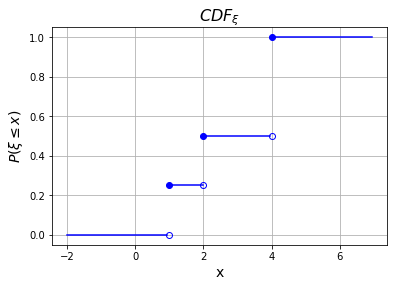

In [39]:
intervals = [(-2, 1), (1, 2), (2, 4), (4, 7)]

for interval in intervals:
    x0, x1 = interval
    xs = np.linspace(x0, x1)[:-1]
    ys = [cdf_xi(x) for x in xs]
    plt.plot(xs, ys, 'b')

eps=1e-3
for (x0, _) in intervals[1:]:
    plt.plot(x0, cdf_xi(x0), 'bo')
    plt.plot(x0, cdf_xi(x0-eps), 'bo', fillstyle='none')
    
plt.title(r'$CDF_{\xi}$', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel(r'$P(\xi \leq x)$', fontsize=14)
plt.grid()

**Ответ:** 1-й момент - $2.75$, 2-й момент - $9.75$, график CDF - приведен выше.

### Задача 4.1

Дана последовательность случайных величин $\xi_1, \xi_2, \ldots \xi_{12}$. Каждая величина $\xi_i$ имеет непрерывное равномерное распределение в диапазоне $[0, 1]$. Найти математическое ожидание и дисперсию для величины
$\eta = \sum_{i=1}^{12} \xi_i - 6$. Что можно сказать о законе распределения этой случайной величины?

#### Решение

Математическое ожидание линейно, что справделиво, даже если случайные величины зависимы. Поэтому:

$$\mathbb{E}\eta = \sum_{i=1}^{12} \mathbb{E}\xi_i - 6 = 12 * 0.5 - 6 = 0$$

На дисперсию не влияет добавление констант, $D[\xi + c] = D[\xi]$, поэтому:

$$D[\eta] = D\left[\sum_{i=1}^{12} \xi_i \right]$$

В общем случае дисперсия суммы не равна сумме дисперсий. Должна быть поправка на взаимосвязи слагаемых величин в виде попарных ковариаций:

$$D\left[\sum_{i=1}^{12} \xi_i \right] 
= \sum_{i=1}^{12} D\left[ \xi_i \right] + 2 \sum_{i < j} \textrm{Cov}(\xi_i, \xi_j)$$

Но мы предположим, что величины $\xi_i$ **независимы** и, соответственно, все ковариации равны нулю. Тогда, учитывая, что дисперсия величины, равномерно распределенной на $[a, b]$, равна $\frac{(b-a)^2}{12}$, имеем:

$$D[\eta] = \sum_{i=1}^{12} D\left[ \xi_i \right] = 12 * \frac{1}{12} = 1$$

Проанализируем теперь распределение $\eta$.

Вопрос о распределении суммы случайных величин, наталкивает на мысль о Центральной предельной теореме. По этой теореме для бесконечной последовательности независимых одинаково распределенных случайных величин c матожиданием $\mu$ и дисперсией $\sigma^2$ верно следующее:
$$\chi_n = \frac{S_n - \mu n}{\sigma \sqrt{n}} \rightarrow \mathcal{N}(0, 1) \textrm{, при } n \rightarrow \infty$$

где $S_n$ - это как раз частичная сумма первых $n$ членов последовательности. Стремление здесь "по распределению", т.е. с определнного $n$ распределение $\chi_n$ станет похожим на стандартное нормальное.


Заметим, что выражение $\chi_n$ есть в точности $\eta$ при $n=12$, что легко проверить, учитывая, что $\mu=0.5$ и $\sigma = \frac{1}{\sqrt{12}}$.

Успеет ли последовательность $\chi_{n}$ к 12-ому элементу стать достаточно похожей на нормальное распределение? Если да, то мы скажем, что $\eta$ распределено похоже на нормальное распределение. Здесь нам поможет теорема Берри-Эссеена, которая дает оценку скорости сходимости в ЦПТ.

Если есть последовательность $X_1, X_2, \ldots, X_n, \ldots$ одинаково распределенных случайных величин, таких что $\mathbb{E}X_n=0$, $\mathbb{E}X_n^2=\sigma^2 > 0$ и $\mathbb{E}|X_n^3|=\rho < \infty$, то $\forall x$ и $\forall 
n$:

$$|F_n(x) - \mathcal{N}(x)| \leq \frac{C \rho}{\sigma^3 \sqrt{n}}$$
$$\textrm{где } F_n(x) \textrm{ - это распределение } \sum_{i=1}^n \frac{X_i}{\sigma \sqrt{n}},
\textrm{ а C - это константа}, C < \frac{1}{2}$$

Здесь может смутить требование $\mathbb{E}X_n = 0$. Но это не препятствие: возьмем величины $\theta_i = \xi_i - \frac{1}{2}$. Тогда:

$$\eta = \sum_{i=1}^{12} \theta_i$$

$$\mathbb{E}\theta_i = 0, \ D[\theta_i] = \frac{1}{12}$$

$$\mathbb{E} |\theta^3| = \rho = \int_{-\frac{1}{2}}^{\frac{1}{2}} |\theta^3| d\theta
=2 \int_{0}^{\frac{1}{2}} \theta^3 d\theta = 2 \left[ \frac{\theta^4}{4} \Biggr|_0^{\frac{1}{2}} \right] = \frac{1}{32}$$

Подставим все в неравенство:

$$\left|F_{\eta}(x) - \mathcal{N}(x)\right| 
= \left|F_{12}(x) - \mathcal{N}(x)\right| 
< \frac{\frac{1}{2} \frac{1}{32}}{\left(\frac{1}{\sqrt{12}}\right)^3 \sqrt{12}} = \frac{3}{16} = 0.1875$$

Учитывая, что область значений всякой функции распределения - это отрезок $[0, 1]$, можно сказать, что описание $\eta$ стандартным нормальным распределением может быть сделано, хотя, возможно, и грубо, потому что верхняя граница на ошибку не очень мала. Проверим в коде, насколько приближение хорошее.

In [89]:
from statsmodels.distributions.empirical_distribution import ECDF

def sample_eta(n, eta_summands):
    return np.random.uniform(0, 1, size=(n, eta_summands)).sum(axis=1) - 0.5 * eta_summands

def test_central_limit_theorem(n_samples, eta_summands=12):
    etas = sample_eta(n_samples, eta_summands)
    ecdf = ECDF(etas)
    plt.plot(ecdf.x, ecdf.y, label='$CDF_{\eta}$')

    gauss = np.random.normal(size=n_samples)
    ecdf = ECDF(gauss)
    plt.plot(ecdf.x, ecdf.y, label='$\Phi$')
    
    plt.legend(fontsize=14)

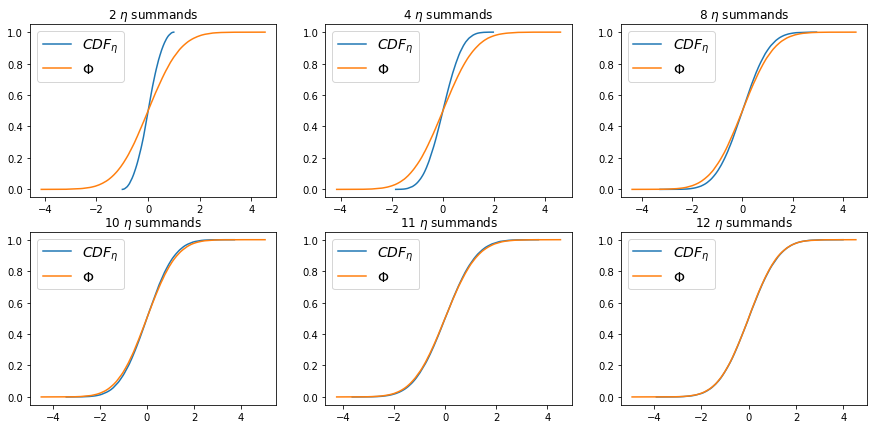

In [90]:
import math

n = 100000

eta_summands = [2, 4, 8, 10, 11, 12]
Nes = len(eta_summands)

plt.figure(figsize=(15, 7))

for i, es in enumerate(eta_summands, start=1):
    plt.subplot(int(math.ceil(Nes / 3)), 3, i)
    plt.title(f"{es} $\eta$ summands")
    test_central_limit_theorem(n, eta_summands=es)

plt.show()

Из программных симуляций видно, что 12 - это ровно то количество слагаемых равномерно распределенных на $[0, 1]$ случайных величин, при которых распределение $F_{\eta}$ визуально неотличимо от нормального.

**Ответ:** $\mathbb{E} \eta = 0$, $D[\eta] = 1$, распределение $\eta$ можно считать стандартным нормальным.